## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

C:\Users\fre_f\anaconda3\envs\FF\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
prefix = 'c:/users/fre_f/PythonProjects/Bacteriological/Data/'
df = pd.read_csv(prefix+'DESL_Species.csv')

In [3]:
df.head()

,Index,DESL,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,...,Light treatment,OSDI score,DEQ5 score,TBUT OD,TBUT OS,OSS OD,OSS OS,ST OD,ST OS,Demodicosis
0,P1,3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,...,0,NaN,NaN,3,3,0,0,23,23,0
1,P2,3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,...,0,31.25,17.0,2,4,1,3,14,18,0
2,P3,2,0.023263,0.714645,0.0,0.0,0,0,0.0,0,...,1,33.30,16.0,8,8,3,3,11,8,0
3,P4,3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,...,0,93.75,21.0,3,2,2,2,12,11,0
4,P5,1,0.016438,0.000000,0.0,0.0,0,0,0.0,0,...,1,6.25,7.0,11,11,0,0,22,32,0


In [7]:
df.iloc[:,2:1340]

,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4316,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__NA;g__NA;s__sp4642,...,k__Bacteria;p__Tenericutes;c__Mollicutes;o__NA;f__NA;g__NA;s__sp67941,k__Bacteria;p__Thermotogae;c__Thermotogae;o__Thermotogales;f__Thermotogaceae;g__NA;s__sp68412,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__NA;f__NA;g__NA;s__sp68841,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Opitutales;f__Opitutaceae;g__Opitutus;s__sp68878,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__Chthoniobacter;s__sp69092,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__Chthoniobacter;s__sp69093,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__NA;g__Terrimicrobium;s__sacchariphilum,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Akkermansia;s__muciniphila,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Haloferula;s__sp69345,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Roseibacillus;s__sp69392
0,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.000000,0.0,0
1,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.000000,0.0,0
2,0.023263,0.714645,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,1.888039,0.0,0
3,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.000000,0.0,0
4,0.016438,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.015896,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.000000,0.0,0
57,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.000000,0,0.0,0,0.000000,0.0,0
58,0.000000,0.644642,0.0,0.0,0,0,0.0,0,0,0.0,...,0.047583,0.0,0.0,0.000000,0,0.0,0,0.000000,0.0,0
59,0.000000,0.000000,0.0,0.0,0,0,0.0,0,0,0.0,...,0.000000,0.0,0.0,0.338815,0,0.0,0,0.000000,0.0,0


In [8]:
df.iloc[:,1]

0     3
1     3
2     2
3     3
4     1
     ..
56    3
57    2
58    2
59    2
60    3
Name: DESL, Length: 61, dtype: int64

In [9]:
X = df.iloc[:,2:1340]
y = df.iloc[:,1]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

## Train, predict and explain

In [10]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
clflgbm = LGBMClassifier(random_state=42)
clflgbm.fit(X, y)
y_pred = clflgbm.predict(X)

In [11]:
print('Accuracy:',accuracy_score(y, y_pred))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_pred))
print('F1 score:',f1_score(y, y_pred,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_pred))
print(confusion_matrix(y, y_pred))

Accuracy: 0.9672131147540983
Balanced accuracy:  0.9722222222222222
F1 score: 0.9667610896817743
MCC: 0.9493480969199279
[[ 8  0  0  0]
 [ 0 16  2  0]
 [ 0  0 31  0]
 [ 0  0  0  4]]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

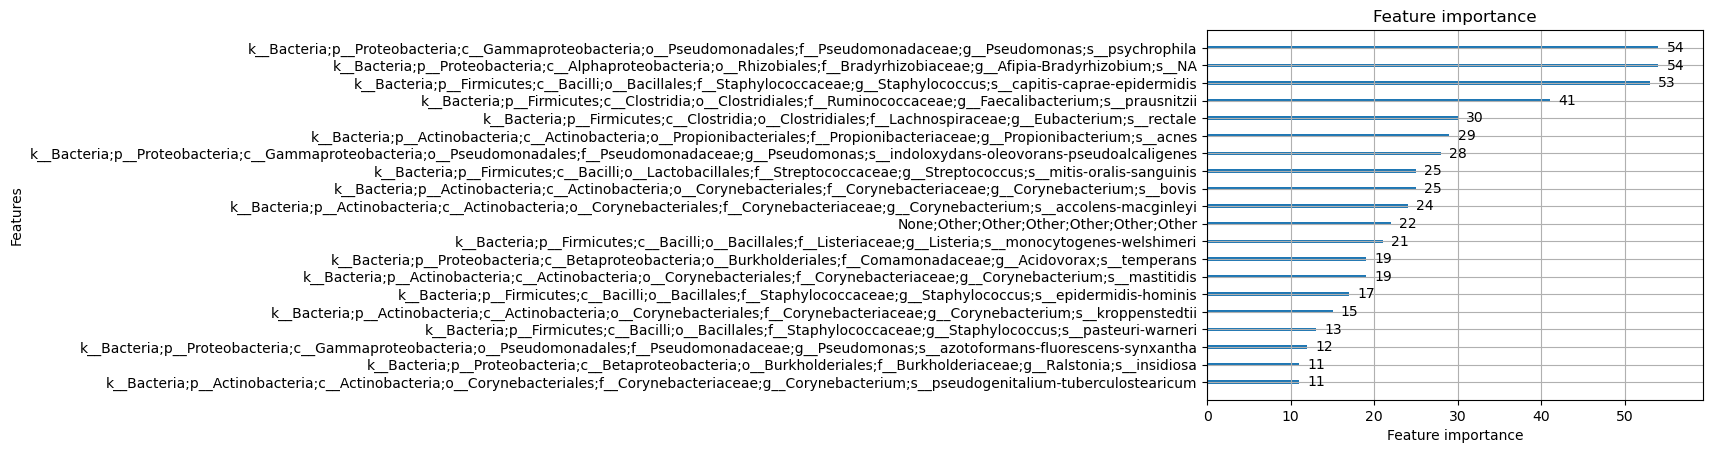

In [13]:
lgb.plot_importance(clflgbm, max_num_features=20, ignore_zero=False)

In [14]:
# Create a SHAP explainer for the LightGBM model

explainerlgbm = shap.Explainer(clflgbm, X)

In [15]:
# Compute SHAP values for the dataset

#shap_valueslgbm = explainerlgbm(X)
shap_valueslgbm = explainerlgbm.shap_values(X.iloc[:,:])

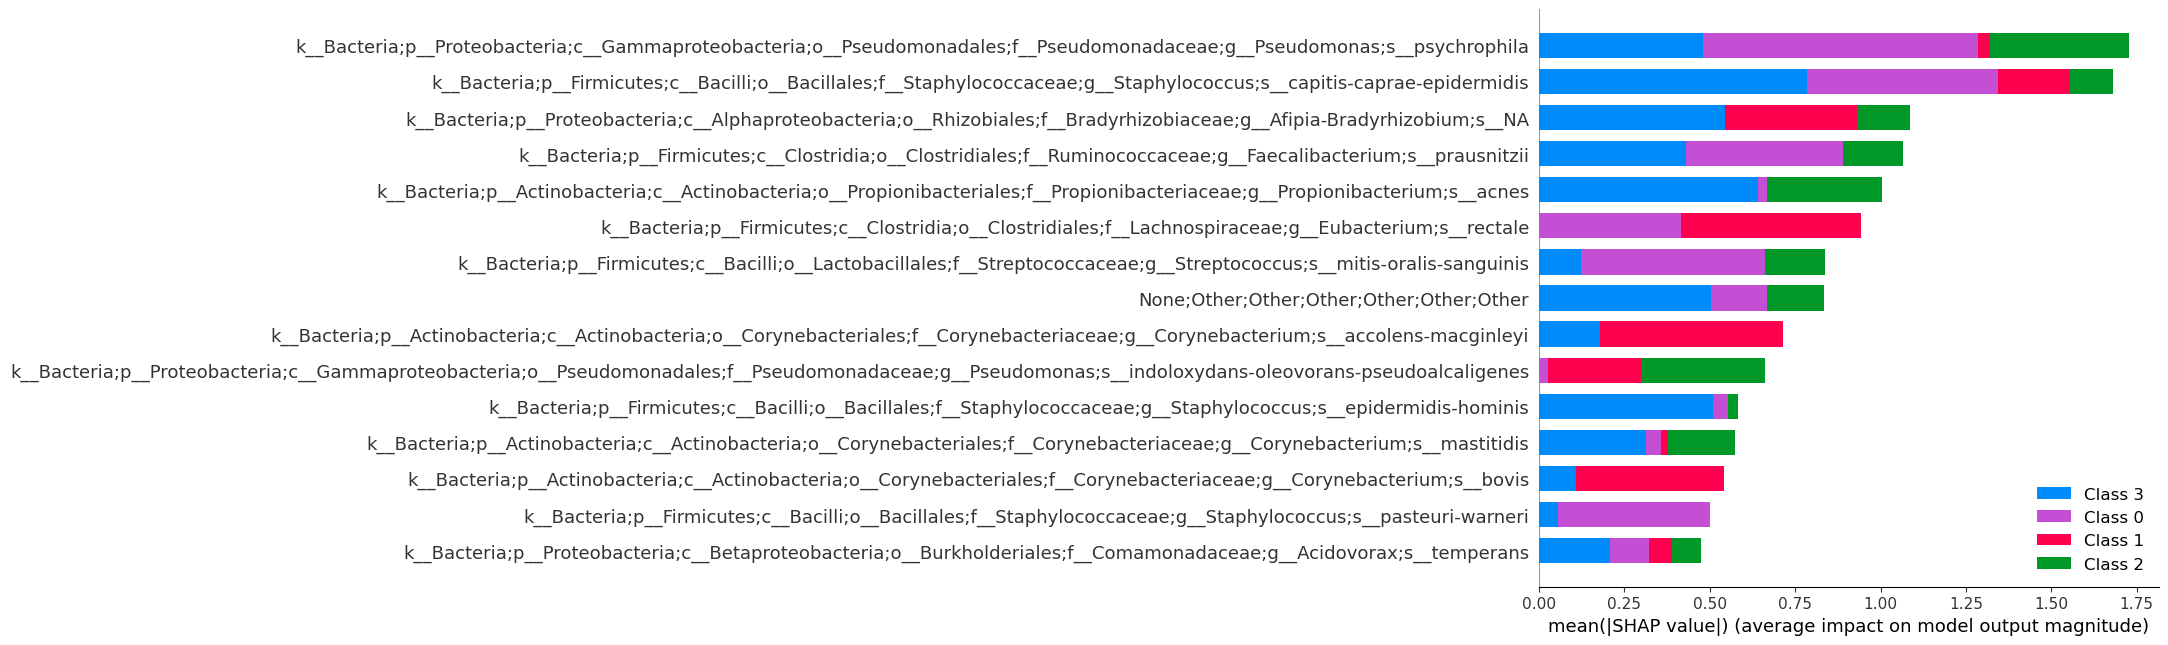

In [17]:
shap.summary_plot(shap_valueslgbm, X, plot_type='bar', max_display=15)

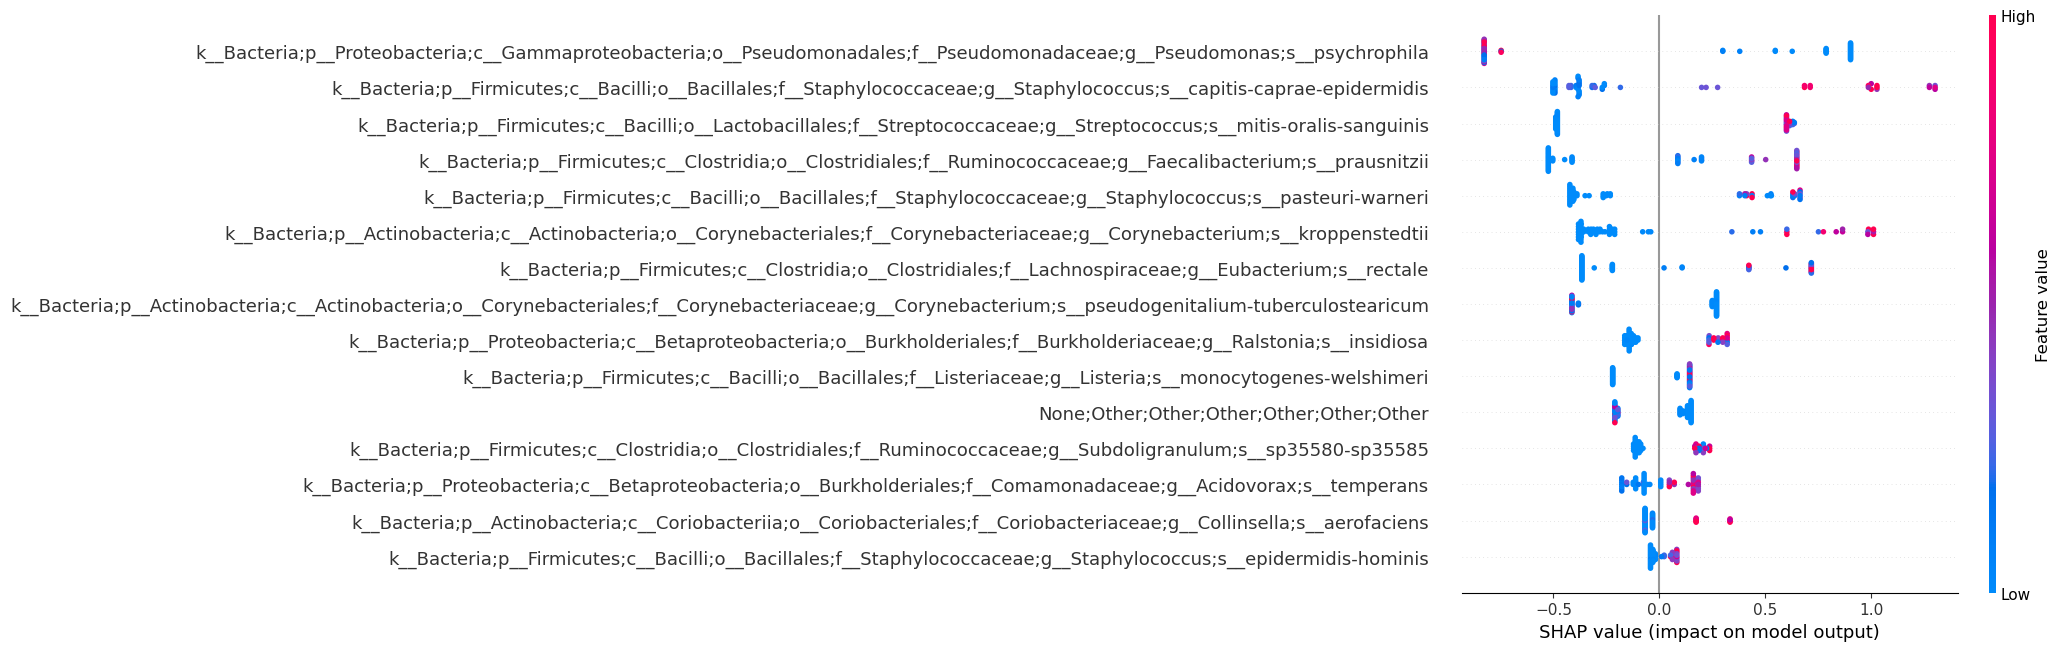

In [19]:
shap.summary_plot(shap_valueslgbm[0], X, max_display=15)

In [30]:
# Make a customized SHAP plot with global values for each feaature

my_features = clflgbm.feature_name_

shap_list0 = []
shap_list1 = []
shap_list2 = []
shap_list3 = []

for i in range(1338):
    shap_list0.append(abs(shap_valueslgbm[0][:,i,]).mean())
    shap_list1.append(abs(shap_valueslgbm[1][:,i,]).mean())
    shap_list2.append(abs(shap_valueslgbm[2][:,i,]).mean())
    shap_list3.append(abs(shap_valueslgbm[3][:,i,]).mean())
    
shap_dict = {}
# Add up shap values from all four classes (DESL 1-4)
for i in range(len(shap_list0)):
    shap_dict[my_features[i]] = shap_list0[i]
    shap_dict[my_features[i]] += shap_list1[i]
    shap_dict[my_features[i]] += shap_list2[i]
    shap_dict[my_features[i]] += shap_list3[i]
    
# Sort in decreasing order
shap_dict = {k:v for k, v in sorted(shap_dict.items(), key=lambda item: item[1], reverse=True)}

most_important_features = []
most_important_values = []

for k, v in shap_dict.items():
    most_important_features.append(k)
    most_important_values.append(v)
    
# Choose top X features
most_important_features = most_important_features[:20]
most_important_values = most_important_values[:20]

most_important_features.reverse()
most_important_values.reverse()

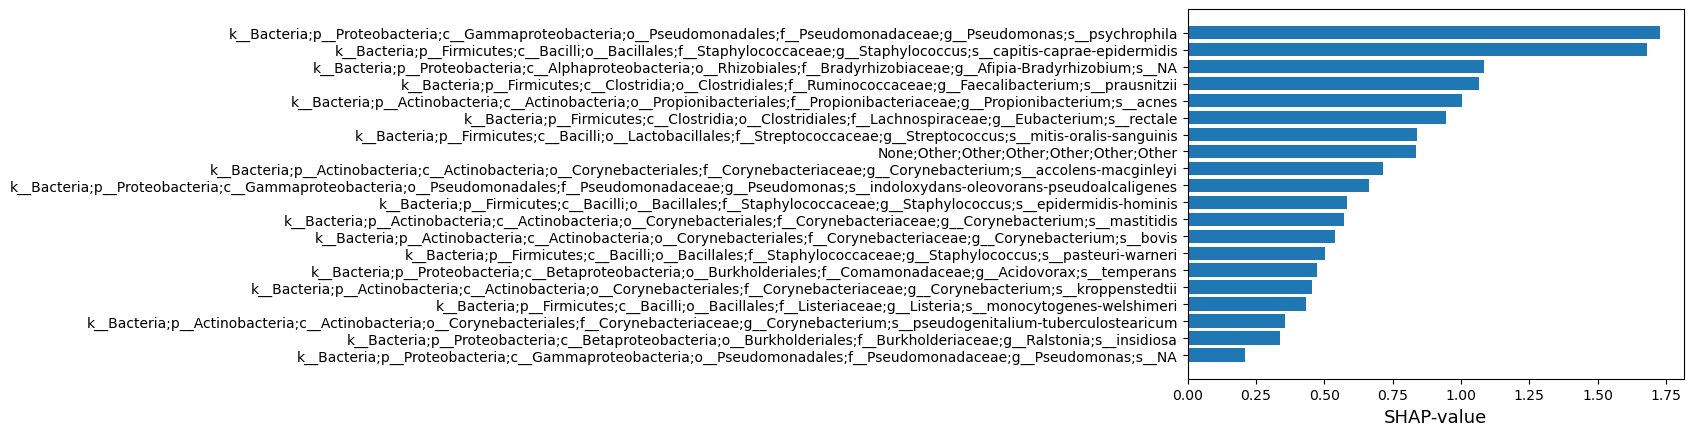

In [31]:
plt.barh(most_important_features, most_important_values)
ax = plt.gca()
plt.xlabel('SHAP-value', size=13)
plt.show()

In [32]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=3000, verbose=False)
clfmlp.out_activation_="softmax"
clfmlp.fit(X, y)
y_predmlp = clfmlp.predict(X)

In [33]:
print('Accuracy:',accuracy_score(y, y_predmlp))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predmlp))
print('F1 score:',f1_score(y, y_predmlp,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predmlp))
print(confusion_matrix(y, y_predmlp))

Accuracy: 1.0
Balanced accuracy:  1.0
F1 score: 1.0
MCC: 1.0
[[ 8  0  0  0]
 [ 0 18  0  0]
 [ 0  0 31  0]
 [ 0  0  0  4]]


In [34]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clfmlp,X, y,n_repeats=20, random_state = 42)

In [35]:
MLPfeatures = pd.DataFrame(clfmlp.feature_names_in_,columns=['Features'])
MLPfeatures['Importance_values'] = result.importances_mean.tolist()
#Sort by importance
MLPfeatures = MLPfeatures.sort_values(by = 'Importance_values',ascending=True)
#Remove features with importance =0
MLPfeatures=MLPfeatures[MLPfeatures['Importance_values']!=0]

In [ ]:
#MLPfeatures20 = MLPfeatures.iloc[-20:,:]

In [ ]:
#MLPfeatures

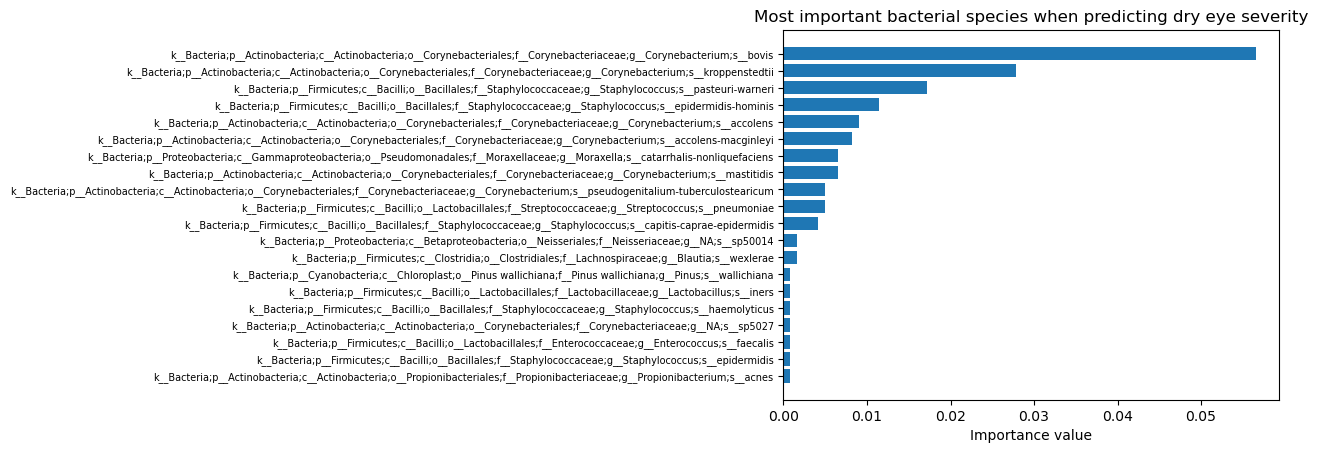

In [36]:
plt.title('Most important bacterial species when predicting dry eye severity')
plt.xlabel('Importance value')
plt.yticks(size=7)
#plt.barh(feature_dfRightZ['Features'],feature_dfRightZ['Importance_values'], height=0.8)
plt.barh(MLPfeatures['Features'], MLPfeatures['Importance_values'], height=0.8)
#plt.savefig('c:/users/fre_f/CBMSfigs/MLPpermOD.jpeg',bbox_inches='tight')
plt.show()